In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing

The following function creates one dimensional linear data and add a gaussian noise i.e $y = a \times x + \varepsilon$

In [6]:
def generate_data(n, a, variance):
    X = np.random.normal(size=(n,))
    Y = X * a + np.sqrt(variance) * np.random.normal(size=(n,))
    return X.reshape((-1,1)), Y

We generate and plot some arbitrary randomized data $(X,Y)$ along the noiseless function $y=ax$

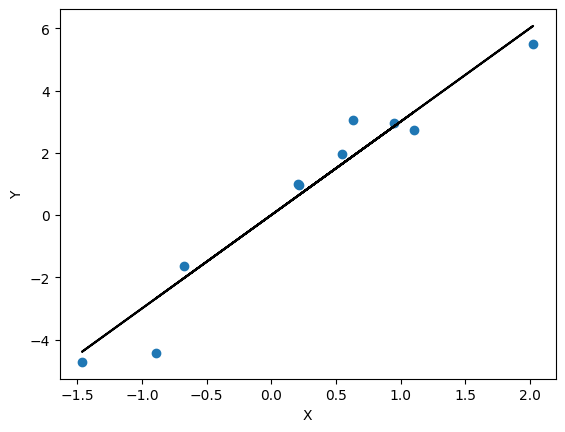

In [15]:
a = 3; n = 10; X, Y = generate_data(n, a, 0.5)
X.shape

plt.scatter(X, Y)
plt.xlabel('X'); plt.ylabel('Y')
plt.plot(X,a*X, c='k')
plt.show()

Next we want to compute the least-square regression using closed form. We use this function on the training data generated above.

In [ ]:
def linear_regression(X, y):
    """
    arguments:
        - X : data matrix
        - y : output
    returns:
        - w : the least square estimator
    """
    ### your code here
    return w